# Scientific plotting with seaborn

In this tutorial, we will use some of the measurements taken in the course and visualize them nicely using the [seaborn Python library](https://seaborn.pydata.org/). Seaborn comes with the advantage that it interacts very nicely with the DataFrame format from the [Python pandas library](https://pandas.pydata.org/) - a convenient way of handling tabular data in Python.

For more detailed information: You may have been used to using [Matplotlib](https://matplotlib.org/) for plotting in Python. In a way, seaborn is just matplotlib - but it expands the functionality of matplotlib to be easier to use for more complex visualizations.

Let's load all the packages we need here:

In [1]:
import seaborn as sns
from pathlib import Path
import pandas as pd

## Loading the data

As a first step, we need to load the measurements from napari. Alternatively, you can download some from the course repository [here](https://github.com/BiAPoL/BioImage-Analysis-and-Data-Processing-Workshop-2025/tree/main/docs/seaborn/measurements). For this, we need to compile a list of all .csv files we take into account.

In [2]:
root = './measurements'

file_paths = [file_path for file_path in Path(root).iterdir() if file_path.suffix == '.csv']
file_paths

[WindowsPath('measurements/17P1_POS0006_D_1UL_features.csv'),
 WindowsPath('measurements/17P1_POS0007_D_1UL_features.csv'),
 WindowsPath('measurements/17P1_POS0011_D_1UL_features.csv'),
 WindowsPath('measurements/20P1_POS0005_D_1UL_features.csv'),
 WindowsPath('measurements/20P1_POS0007_D_1UL_features.csv'),
 WindowsPath('measurements/20P1_POS0008_D_1UL_features.csv'),
 WindowsPath('measurements/20P1_POS0010_D_1UL_features.csv'),
 WindowsPath('measurements/A9_p5d_features.csv'),
 WindowsPath('measurements/A9_p7d_features.csv'),
 WindowsPath('measurements/A9_p9d_features.csv')]

Next, we load them all into pandas dataframes. For this, we go through the data in a for-loop, load each file and then concatenate all the tabular data into a single table. Let's look into a single dataframe first to see what we are dealing with. The `df.head(5)` command shows us the first 5 rows of the table so that we don't clutter our output with tons of tabular data:

In [3]:
first_file = file_paths[0] # Get the first file path
df = pd.read_csv(first_file) # Load the first dataframe
df.head(5) # Display the first 5 rows of the dataframe

,label,area_filled,perimeter,axis_major_length,axis_minor_length,eccentricity,area,intensity_mean,intensity_max,intensity_min
0,1,29.0,18.863961,7.853437,4.935022,0.777898,29.0,58.724138,67.0,49.0
1,2,32.0,24.242641,12.953143,3.174186,0.969510,32.0,73.343750,118.0,40.0
2,3,316.0,65.112698,22.947857,17.642785,0.639465,316.0,95.332278,248.0,22.0
3,4,258.0,60.284271,22.477335,14.716400,0.755870,258.0,113.585271,204.0,19.0
4,5,59.0,32.278175,15.198125,5.328297,0.936529,59.0,80.881356,162.0,35.0


Let's load everything now! 

*Hint* We may want to distinguish from which dataset which measurement came. To do so, we simply add another column to each dataframe, that indicates from whhich image the respective measurement comes.

In [4]:
big_df = pd.DataFrame() # create empty dataframe

for file_path in file_paths: # iterate over all files
    df = pd.read_csv(file_path)  #load dataframe
    df['sample'] = file_path.stem  # add column with sample name
    big_df = pd.concat([big_df, df], axis=0)  # append table to big_df

big_df = big_df.reset_index(drop=True)  # reset index

In [5]:
big_df

,label,area_filled,perimeter,axis_major_length,axis_minor_length,eccentricity,area,intensity_mean,intensity_max,intensity_min,sample
0,1,29.0,18.863961,7.853437,4.935022,0.777898,29.0,58.724138,67.0,49.0,17P1_POS0006_D_1UL_features
1,2,32.0,24.242641,12.953143,3.174186,0.969510,32.0,73.343750,118.0,40.0,17P1_POS0006_D_1UL_features
2,3,316.0,65.112698,22.947857,17.642785,0.639465,316.0,95.332278,248.0,22.0,17P1_POS0006_D_1UL_features
3,4,258.0,60.284271,22.477335,14.716400,0.755870,258.0,113.585271,204.0,19.0,17P1_POS0006_D_1UL_features
4,5,59.0,32.278175,15.198125,5.328297,0.936529,59.0,80.881356,162.0,35.0,17P1_POS0006_D_1UL_features
...,...,...,...,...,...,...,...,...,...,...,...
919,144,200.0,52.384776,18.530911,14.190467,0.643111,200.0,78.305000,142.0,28.0,A9_p9d_features
920,145,21.0,20.207107,12.476841,1.973087,0.987417,21.0,50.523810,65.0,39.0,A9_p9d_features
921,146,250.0,78.284271,32.580598,11.991364,0.929805,250.0,74.804000,151.0,31.0,A9_p9d_features
922,147,23.0,18.242641,9.710753,3.102526,0.947588,23.0,53.478261,69.0,40.0,A9_p9d_features


From the data here we can see that there are three different sample types - A9, 17P1 and 20P1. Let's add a column to the dataframe that indicates from which type the respective image was taken. We can do this by splitting the sample name, getting the first part of the name and adding it as a new column to the dataframe.

In [6]:
big_df['experiment'] = big_df['sample'].apply(lambda x: x.split('_')[0]) # Split the sample name by underscore and take the first part as the experiment name
big_df

,label,area_filled,perimeter,axis_major_length,axis_minor_length,eccentricity,area,intensity_mean,intensity_max,intensity_min,sample,experiment
0,1,29.0,18.863961,7.853437,4.935022,0.777898,29.0,58.724138,67.0,49.0,17P1_POS0006_D_1UL_features,17P1
1,2,32.0,24.242641,12.953143,3.174186,0.969510,32.0,73.343750,118.0,40.0,17P1_POS0006_D_1UL_features,17P1
2,3,316.0,65.112698,22.947857,17.642785,0.639465,316.0,95.332278,248.0,22.0,17P1_POS0006_D_1UL_features,17P1
3,4,258.0,60.284271,22.477335,14.716400,0.755870,258.0,113.585271,204.0,19.0,17P1_POS0006_D_1UL_features,17P1
4,5,59.0,32.278175,15.198125,5.328297,0.936529,59.0,80.881356,162.0,35.0,17P1_POS0006_D_1UL_features,17P1
...,...,...,...,...,...,...,...,...,...,...,...,...
919,144,200.0,52.384776,18.530911,14.190467,0.643111,200.0,78.305000,142.0,28.0,A9_p9d_features,A9
920,145,21.0,20.207107,12.476841,1.973087,0.987417,21.0,50.523810,65.0,39.0,A9_p9d_features,A9
921,146,250.0,78.284271,32.580598,11.991364,0.929805,250.0,74.804000,151.0,31.0,A9_p9d_features,A9
922,147,23.0,18.242641,9.710753,3.102526,0.947588,23.0,53.478261,69.0,40.0,A9_p9d_features,A9


## Plotting: Distributions

Now for the actual plotting: Let's try it with a histogram of the nuclei sizes first. The seaborn syntax is very simple: we pass the measurements table `big_df` directly to the plotting function (`sns.histplot`) and tell seaborn which variable (column) to take into account for the histogram.

We store each plot result in a variable `fig` + number so that we can save it later on.

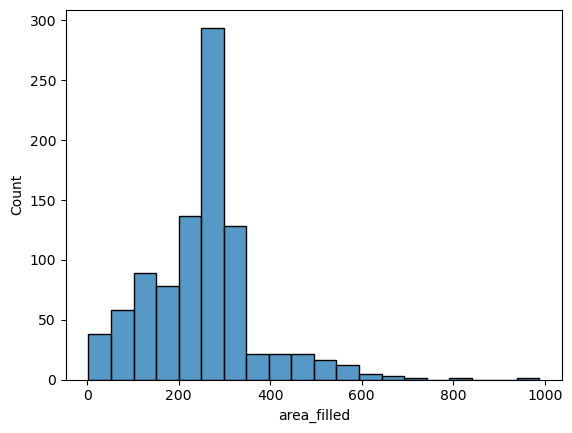

In [7]:
fig1 = sns.histplot(data=big_df, x='area_filled', bins=20)

Seaborn also offers to turn this into a smoothed distribution estimate (a [*kernel-density estimation*](https://en.wikipedia.org/wiki/Kernel_density_estimation)):

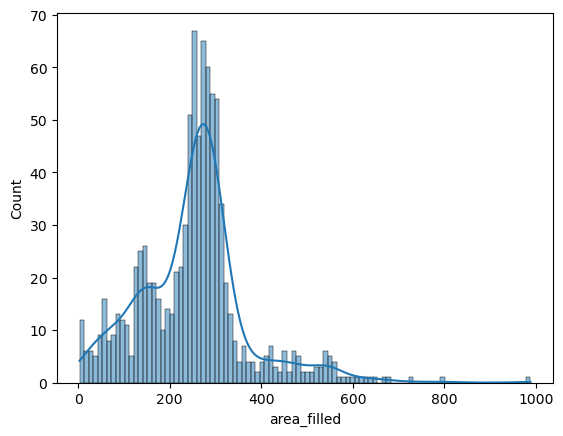

In [8]:
fig2 = sns.histplot(data=big_df, x='area_filled', bins=100, kde=True)

But where seaborn really shines, is when it comes to comparing different groups in datasets (i.e., categorical variables). If we wanted to compare directly how the nuclei sizes differ between the different conditions (i.e., images), we can simply pass `sample` on to seaborn as the `hue` parameter:

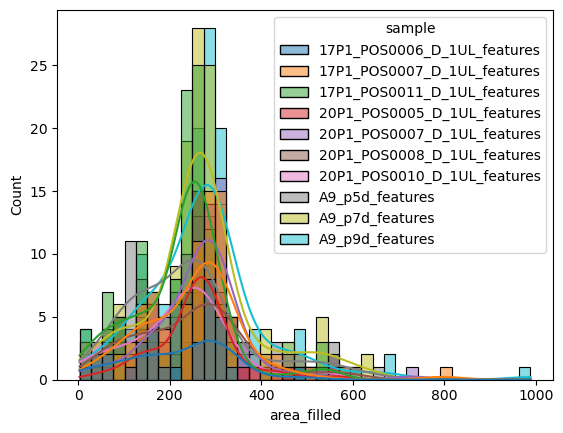

In [9]:
fig3 = sns.histplot(data=big_df, x='area_filled', hue='sample', kde=True)

Let's replace the `sample` as the category by the `experiment` column:

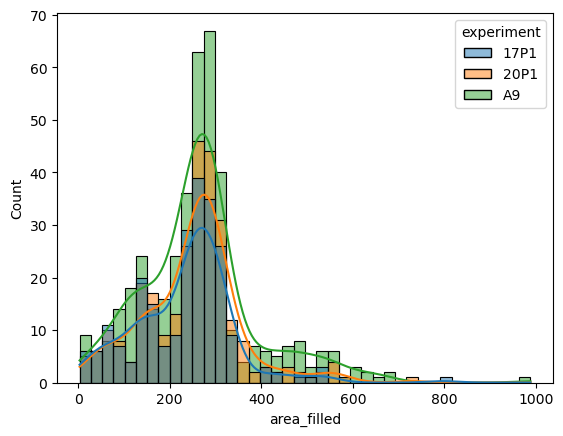

In [10]:
fig4 = sns.histplot(data=big_df, x='area_filled', hue='experiment', kde=True)

If you only want the smoothed histogram estimations rather than the bars, consider using the `kdeplot` function rather than the histogram:

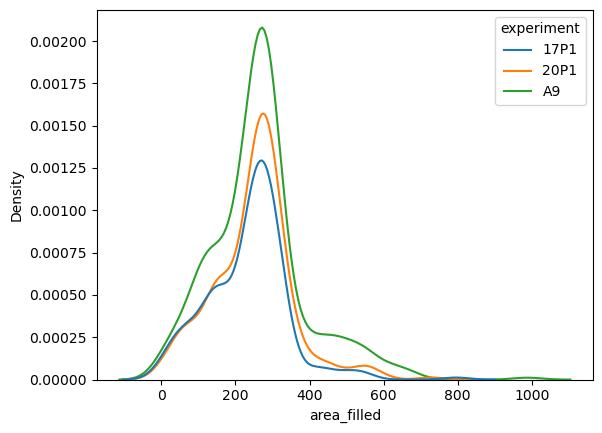

In [11]:
fig5 = sns.kdeplot(data=big_df, x='area_filled', hue='experiment')

## Plotting: Scatters

For a more granular insight into the individual data points, let's take one step back and draw a good old scatterplot and draw two of the above variables against ech other:

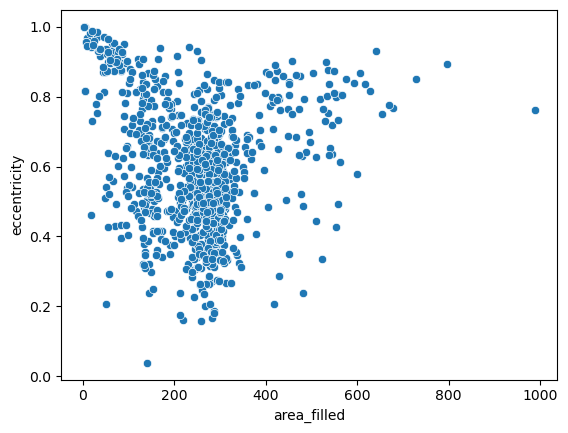

In [12]:
fig6 = sns.scatterplot(data=big_df, x='area_filled', y='eccentricity')

Again, we can simply pass a categorical variable as `hue` parameter and highlight the different samples. Let's look at a different property:

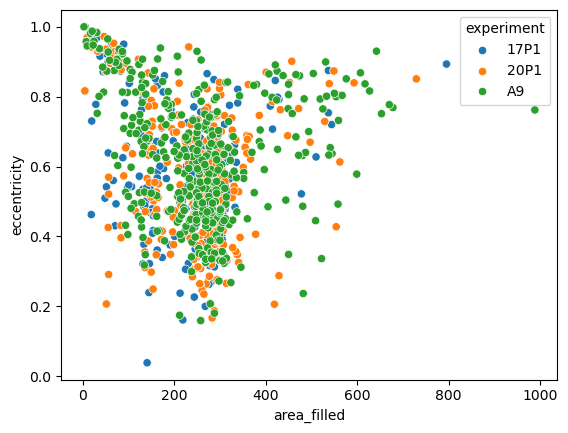

In [13]:
fig7 = sns.scatterplot(data=big_df, x='area_filled', y='eccentricity', hue='experiment')

For a smaller number of features, you may want to plot everything against everything - something that may be terribly hard to do in matplotlib. We drop the `label` column, though - it holds no information about any relevant biology:

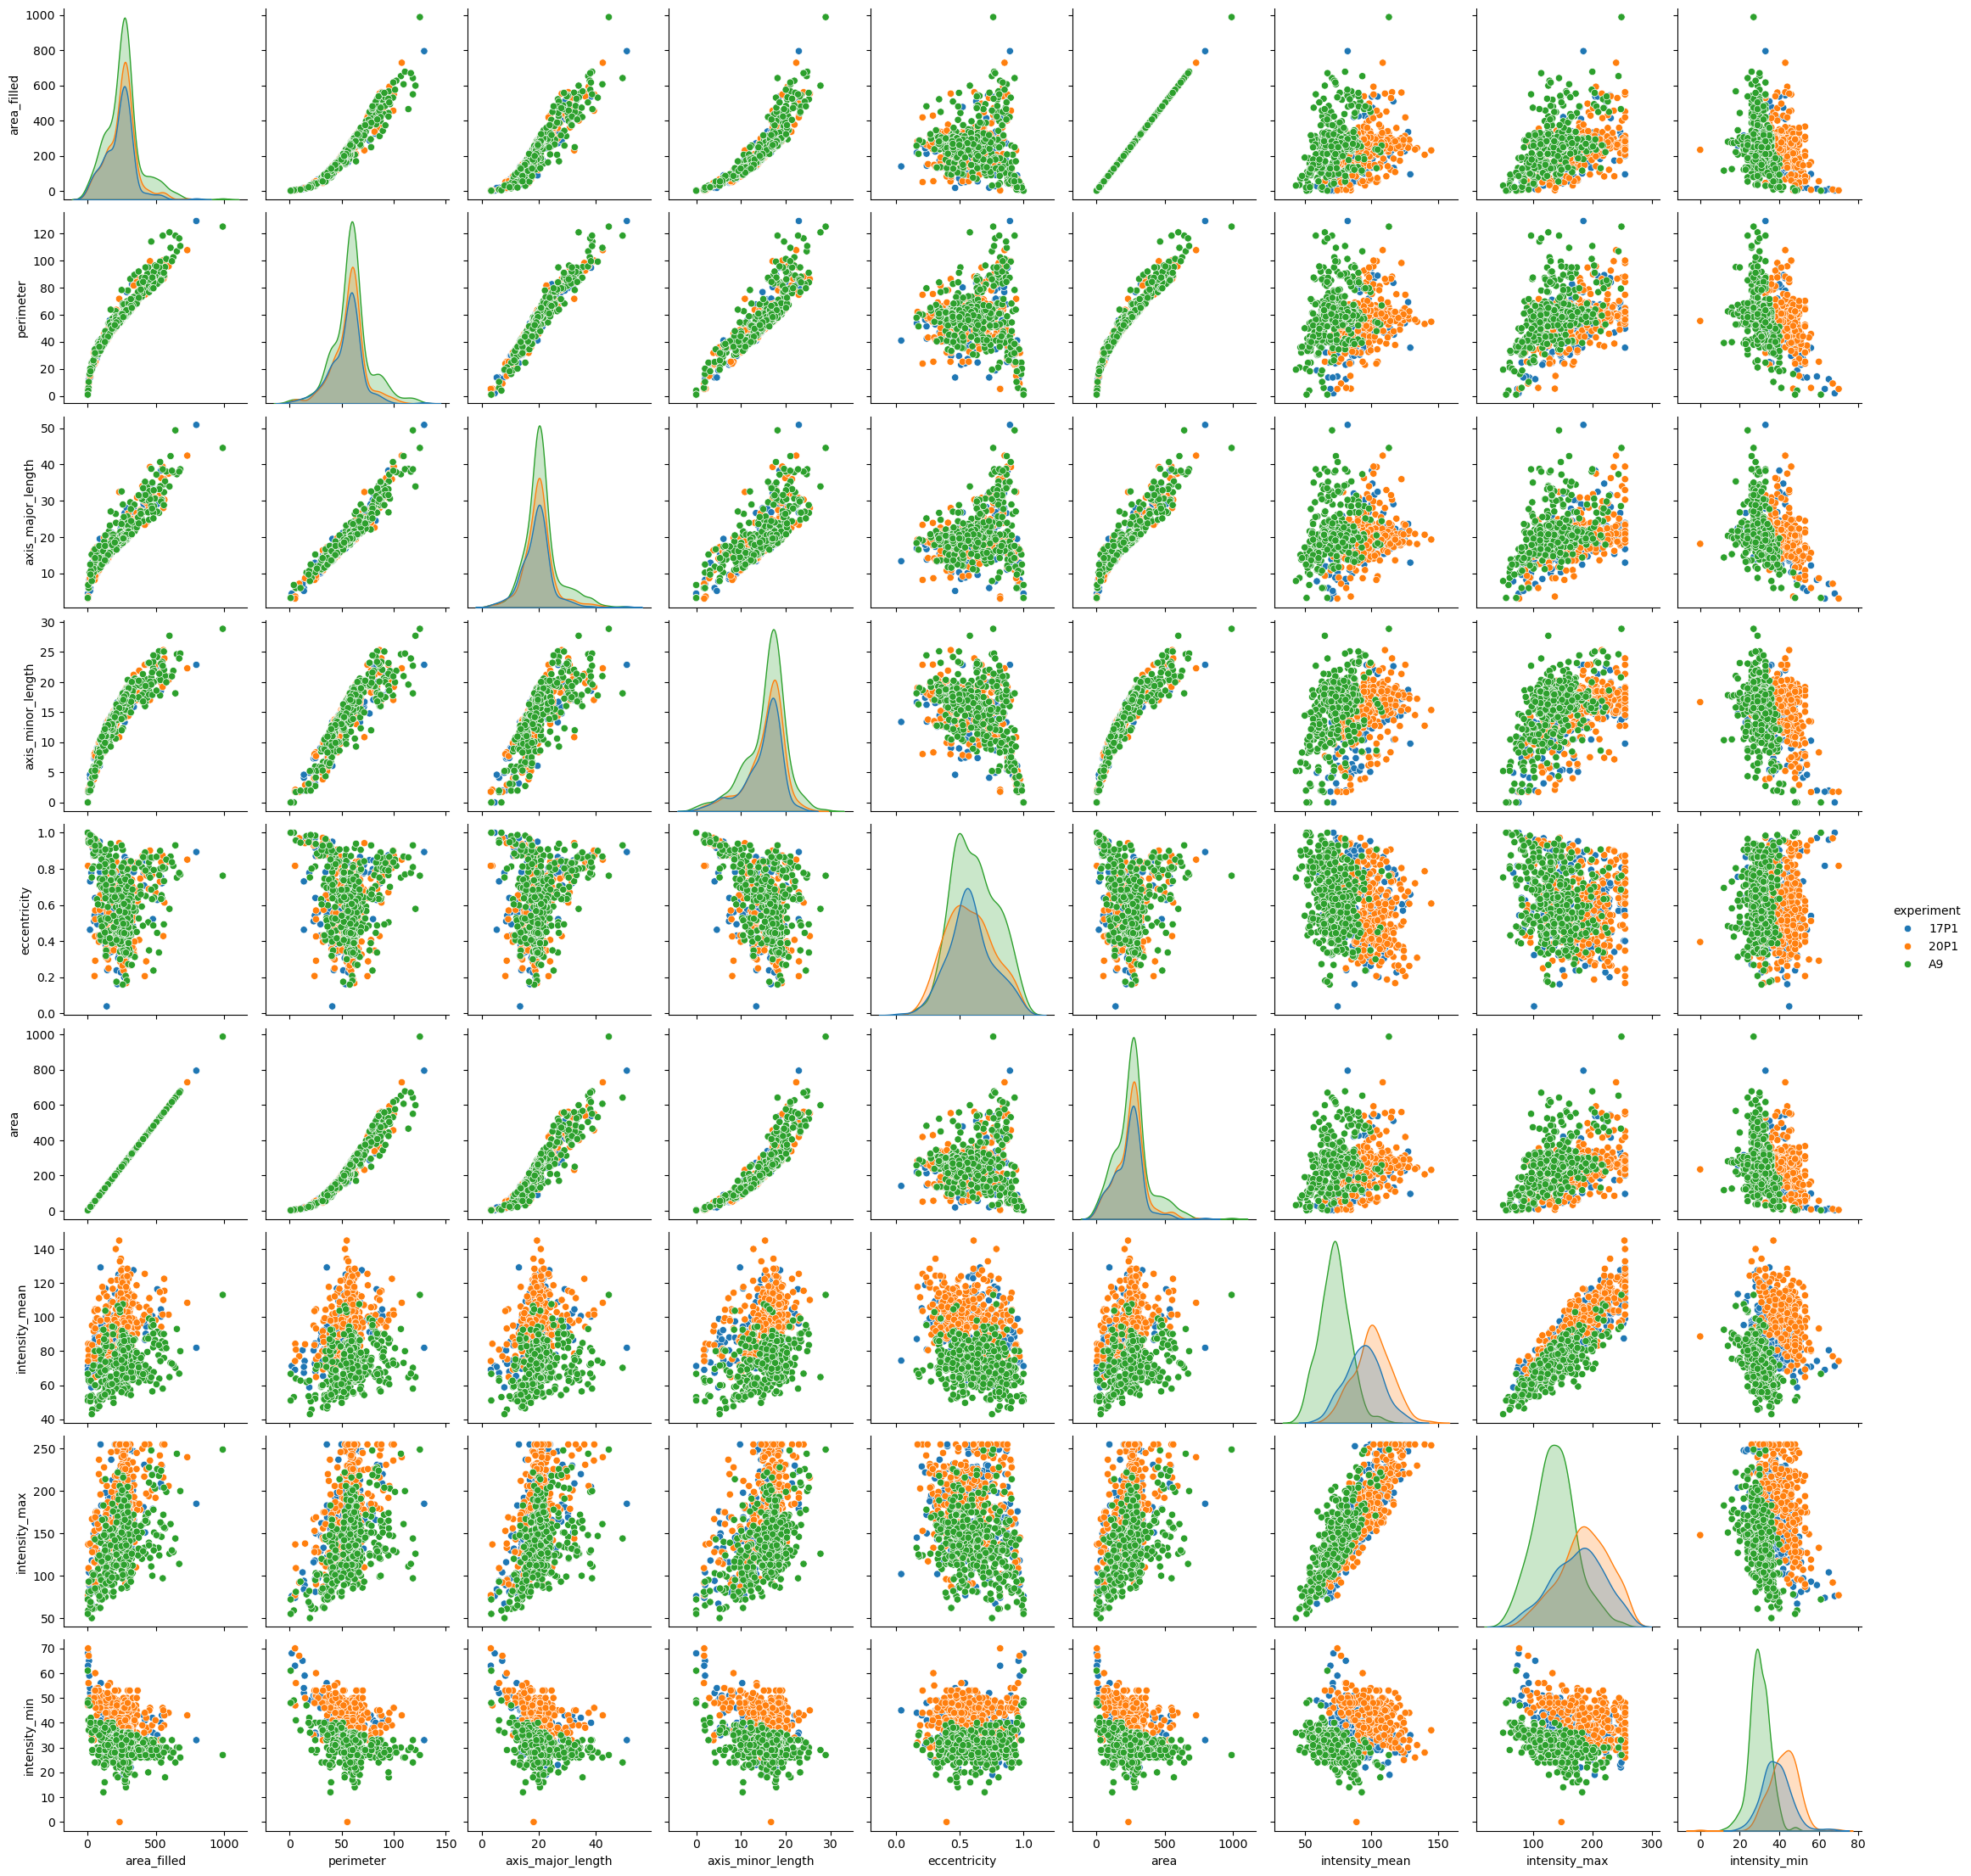

In [14]:
fig8 = sns.pairplot(data=big_df.drop(columns=['label']), hue='experiment')

## Saving the plots

Finally, we can save the plots to a file. For this, we can use the `savefig` function from matplotlib. We can also specify the resolution of the image in dpi (dots per inch). The command below saves the pairplot to a file called `pairplot.png` with a resolution of 300 dpi in the current working directory:

In [15]:
fig8.savefig('pairplot.png', dpi=300)

## Exercise

- Replace the `area_filled` variable with `intensity_mean` (or another column) in the code above and see how the plots change. 

- Try out other seaborn functions to visualize data distributions split by categories, like `sns.catplot` and `sns.jointplot`, as shown in the [seaborn documentation](https://seaborn.pydata.org/tutorial/introduction.html#plots-for-categorical-data).

## Package versions used to run this notebook

In [16]:
import watermark
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-06-30T16:42:38.967258+02:00

Python implementation: CPython
Python version       : 3.10.0
IPython version      : 8.37.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 16
Architecture: 64bit

watermark: 2.5.0
seaborn  : 0.13.2
pandas   : 2.3.0

